In [1]:
import volume_finder
import MDAnalysis as mda
import trimesh
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

/Users/danielevans/Desktop/work/lau/mda/mda_3p9/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
u=mda.Universe("../../example/OMT_clean_cys_c.psf", "../../example/OMT_rep00_aligned.dcd")
prot_atoms = u.select_atoms("protein")

In [3]:
roi_sphere = trimesh.primitives.Sphere(center=prot_atoms[0].position, radius=10, subdivisions=2)
roi_voxel = roi_sphere.voxelized(0.7)

s = volume_finder.ProteinSurface(prot_atoms, 1.4)
    
su = volume_finder.voxel_subtract(roi_voxel, s.surf)
volume_finder.show_pocket(s.surf, su)

2022-07-05 12:39:46.467 Python[22570:1485261] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/ns/3vj5l9t51573yvmylknzf4dw0000gn/T/org.python.python.savedState


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

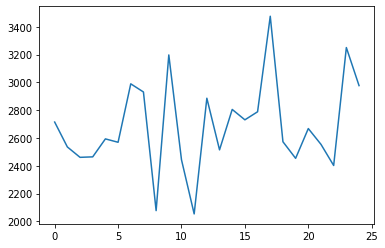

In [4]:
volumes = []
for frame in u.trajectory[::100]:
    roi_sphere = trimesh.primitives.Sphere(center=prot_atoms[0].position, radius=10, subdivisions=2)
    roi_voxel = roi_sphere.voxelized(0.7)
    roi_voxel.fill()
    
    s = volume_finder.ProteinSurface(prot_atoms, 1.4)
    
    su = volume_finder.voxel_subtract(roi_voxel, s.surf)
    volumes.append(su.volume)

plt.plot(volumes)
plt.show()